In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input\heart-attack-analysis-prediction-dataset\heart.csv
./input\red-wine-quality-cortez-et-al-2009\winequality-red.csv
./input\restaurant-scores-san-francisco\Restaurant_Scores_-_LIVES_Standard.csv
./input\stroke-prediction-dataset\healthcare-dataset-stroke-data.csv
./input\weather-data\Weather Data.csv


In [2]:
weather = pd.read_csv("./input/weather-data/Weather Data.csv")
weather.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
weather["Date/Time"] = pd.to_datetime(weather["Date/Time"])
weather.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [4]:
typeofweather = weather['Weather'].str.get_dummies(sep=',')
forecast = pd.concat([weather,typeofweather],axis=1)
forecast = forecast.drop("Weather",axis=1)
forecast.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Blowing Snow,Clear,Cloudy,...,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
forecast["Day"]=forecast["Date/Time"].dt.weekday
forecast["Hour"]=forecast["Date/Time"].dt.hour
import datetime as dt
forecast['Date/Time']=forecast['Date/Time'].map(dt.datetime.toordinal)
forecast.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Blowing Snow,Clear,Cloudy,...,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms,Day,Hour
0,734503,-1.8,-3.9,86,4,8.0,101.24,0,0,0,...,0,0,0,0,0,0,0,0,6,0
1,734503,-1.8,-3.7,87,4,8.0,101.24,0,0,0,...,0,0,0,0,0,0,0,0,6,1
2,734503,-1.8,-3.4,89,7,4.0,101.26,0,0,0,...,0,0,0,0,0,0,0,0,6,2
3,734503,-1.5,-3.2,88,6,4.0,101.27,0,0,0,...,0,0,0,0,0,0,0,0,6,3
4,734503,-1.5,-3.3,88,7,4.8,101.23,0,0,0,...,0,0,0,0,0,0,0,0,6,4


## Prediction of Visibility

In [6]:
X = forecast.drop("Visibility_km",axis=1)
y = forecast["Visibility_km"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Ridge Regression

In [8]:
from sklearn.linear_model import Ridge
np.random.seed(42)
rmodel = Ridge()
rmodel.fit(X_train,y_train)
print(f"Ridge Model Accuracy: {rmodel.score(X_test,y_test) *100}%")

Ridge Model Accuracy: 53.896773544977904%


### Random Forest Regression

In [9]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train,y_train)
print(f"Random Forest Model Accuracy: {rfmodel.score(X_test,y_test) *100}%")

Random Forest Model Accuracy: 76.55673751908319%


In [10]:
y_preds = rfmodel.predict(X_test)
y_preds[:5]

array([43.654, 24.982, 13.64 , 47.583, 26.165])

*Mean absolute error*

In [11]:
#Comparing truth with predictions
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

3.6950461013090394

*R^2 or Coefficient of determination*

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_preds)

0.7655673751908318

*Mean Squared Error*

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preds)

37.21582426977798

#### Comparing Predicted vs Actual Value

In [14]:
compare = pd.DataFrame(data={"Actual":y_test,"Predicted":y_preds})
compare.head()

,Actual,Predicted
5291,48.3,43.654
4128,25.0,24.982
1772,12.9,13.640
7142,48.3,47.583
3962,25.0,26.165


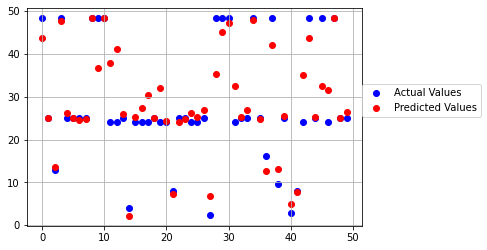

In [15]:
comp=compare[:50]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.arange(0, len(comp),1)
ax.scatter(x,comp["Actual"],c="b",label="Actual Values")
ax.scatter(x,comp["Predicted"],c="r",label="Predicted Values")
ax.legend(loc=(1,0.5))
ax.grid()

#### Scoring Parameter

In [16]:
from sklearn.model_selection import cross_val_score
#R^2 Score
cv_r2= cross_val_score(rfmodel, X,y,cv=5,scoring="r2")
print(f"Cross Validated R^2 Score is {np.mean(cv_r2):2f}")

Cross Validated R^2 Score is 0.418891


### Hyperparameter tuning using RandomizedSearchCV

In [17]:
rfmodel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

In [19]:
from sklearn.model_selection import RandomizedSearchCV
rsmodel = RandomizedSearchCV(estimator=rfmodel,
                            param_distributions=grid,
                            n_iter=20,
                            cv=5,
                            verbose=2)
rsmodel.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  46.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  20.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  39.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  47.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  27.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=  44.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time= 1.2min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estima

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   4.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.2s
[CV] END max_depth=20, max_features=auto, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [20]:
rsmodel.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [21]:
rs_y_preds = rsmodel.predict(X_test)
rs_y_preds

array([42.40212771, 25.03768208, 14.24674935, ..., 25.0494747 ,
       17.90076862, 25.40920968])

In [22]:
compare = pd.DataFrame(data={"Actual":y_test,"Predicted":rs_y_preds})
compare.head()

,Actual,Predicted
5291,48.3,42.402128
4128,25.0,25.037682
1772,12.9,14.246749
7142,48.3,47.329317
3962,25.0,25.540615


In [23]:
rsmodel.score(X_test,y_test)

0.7591808096569534

### Hyperparameter tuning using GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "n_estimators": [100, 1000],
    "max_depth": [None, 5],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4]
}

gs_model = GridSearchCV(rfmodel, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   7.9s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   7.8s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   8.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time= 1.4min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time= 1.3min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time= 1.3min
[CV] END max_dept

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 1000]},
             verbose=2)

In [25]:
gs_model.score(X_test, y_test)

0.7708006838521093

### Saving Model

In [26]:
import pickle
#Save
pickle.dump(gs_model,open("gs_model_randomforest.pkl","wb"))

In [27]:
#Load Model
loadmodel = pickle.load(open("gs_model_randomforest.pkl","rb"))

In [28]:
loadmodel.score(X_test,y_test)

0.7708006838521093